# Base

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'
    new_url = re.sub(pattern, replacement, url)
    return new_url

In [3]:
def rgba(r, g, b, a) -> tuple:
  return ((r/255), g/255, b/255, float(a))

In [4]:
current_date = pd.to_datetime('2024-07-14')

In [5]:
# RGBA
# accent_color = (215/255, 166/255, 190/255, 1.0)
accent_color = rgba(32, 113, 152, 1)
accent_color2 = (217/255, 14/255, 113/255, 1.0)
pie_colors = [accent_color, (255/255, 228/255, 255/255, 1.0), (203/255, 162/255, 174/255, 1.0)]
blue_pie_colors = [rgba(0, 191, 255, 1), rgba(89, 165, 245, 1), rgba(0, 119, 194, 1), rgba(0, 97, 154, 1)]

black_back = rgba(22, 22, 29, 1)

In [90]:
# sns.set_theme(style="darkgrid")
sns.set_style("darkgrid")
plt.rcParams.update({
    # 'axes.facecolor': (22/255, 22/255, 29/255, 1),  # RGBa для фона осей
    # 'figure.facecolor': (0, 0, 0, 0),  # RGBa для фона фигуры
    'text.color': 'black',  # Цвет текста
    'axes.labelcolor': 'black',  # Цвет подписей осей
    'xtick.color': 'white',  # Цвет меток по оси X
    'ytick.color': 'white',  # Цвет меток по оси Y
    'grid.color': 'grey',  # Цвет сетки
    'axes.edgecolor': 'white'  # Цвет края графика
})

# Interaction

In [7]:
url = 'https://docs.google.com/spreadsheets/d/16d7ttCLqka5VDwt-7HlY_WV0VpVBibDNCrbhkg0BRmA/edit?gid=110057422#gid=110057422'
interaction_url = convert_google_sheet_url(url)
interaction_url

'https://docs.google.com/spreadsheets/d/16d7ttCLqka5VDwt-7HlY_WV0VpVBibDNCrbhkg0BRmA/export?format=csv'

In [8]:
inter_df = pd.read_csv(interaction_url, nrows=3405)
inter_df.head(5)

,userid,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1


## График распределения количества жалоб пользователей

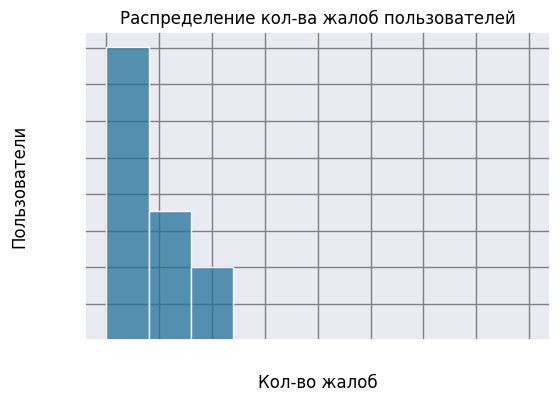

In [91]:
plt.figure(figsize=(6, 4))
sns.histplot(data=inter_df, x='complain_count', bins=10, color=accent_color)
plt.title('Распределение кол-ва жалоб пользователей')
plt.xlabel('Кол-во жалоб')
plt.ylabel('Пользователи')
plt.grid(True)
plt.show()

## Среднее количество покупок по различным каналам

In [10]:
channels = ['discount_purchases_count_avg',
            'catalogue_purchases_count_avg',
            'store_purchases_count_avg',
            'website_purchases_count_avg',
            'mobile_purchases_count_avg'
            ]

for channel in channels:
    mean_value = inter_df[channel].mean()
    inter_df[channel].fillna(mean_value, inplace=True)

inter_df[channels].head(5)

,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,mobile_purchases_count_avg
0,2,0,4,3,18
1,2,0,0,2,3
2,2,2,8,6,1
3,5,0,2,1,4
4,0,0,2,0,0


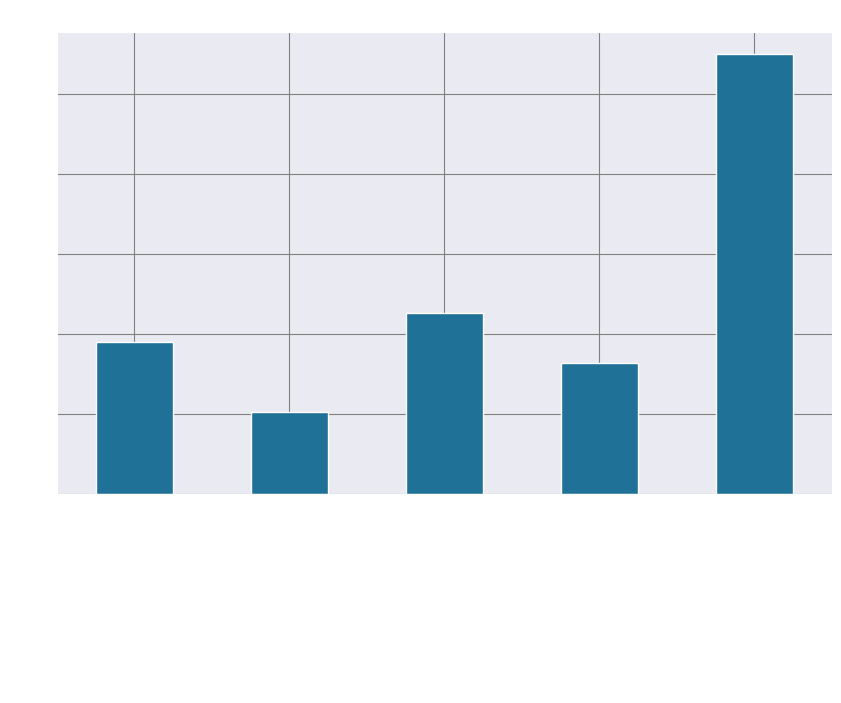

In [11]:
avg_purchases = inter_df[channels].mean()

plt.figure(figsize=(10, 6))
avg_purchases.plot(kind='bar', color=accent_color)
plt.title('Среднее кол-во покупок по различным каналам')
plt.xlabel('Канал покупок')
plt.ylabel('Среднее кол-во покупок')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

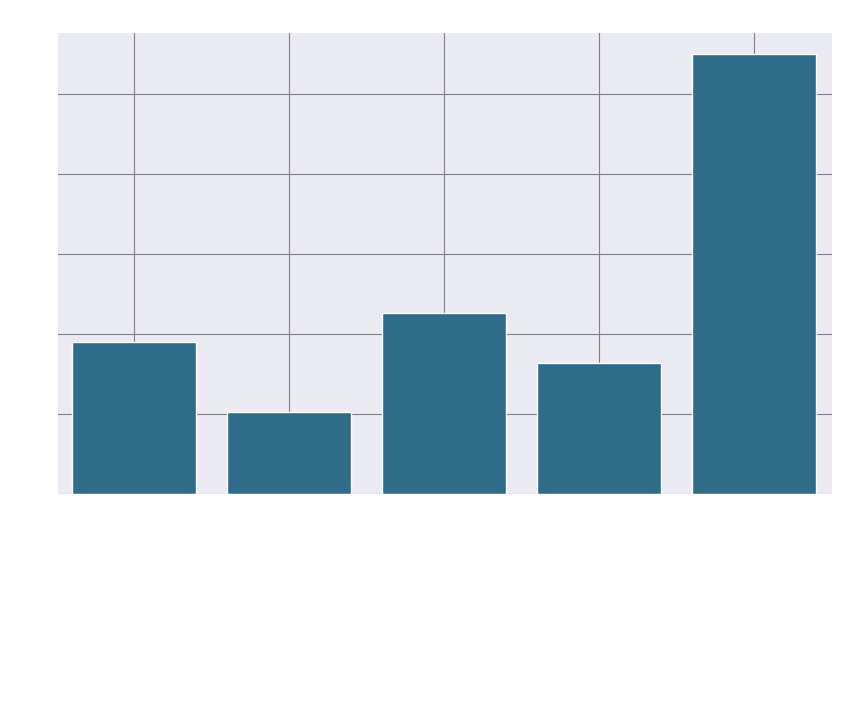

In [12]:
plt.figure(figsize=(10, 6))
# avg_purchases.plot(kind='bar', color='skyblue')
sns.barplot(data=avg_purchases, color=accent_color, )
plt.title('Среднее кол-во покупок по различным каналам')
plt.xlabel('Канал покупок')
plt.ylabel('Среднее кол-во покупок')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Средние значения результатов маркетинговых кампаний

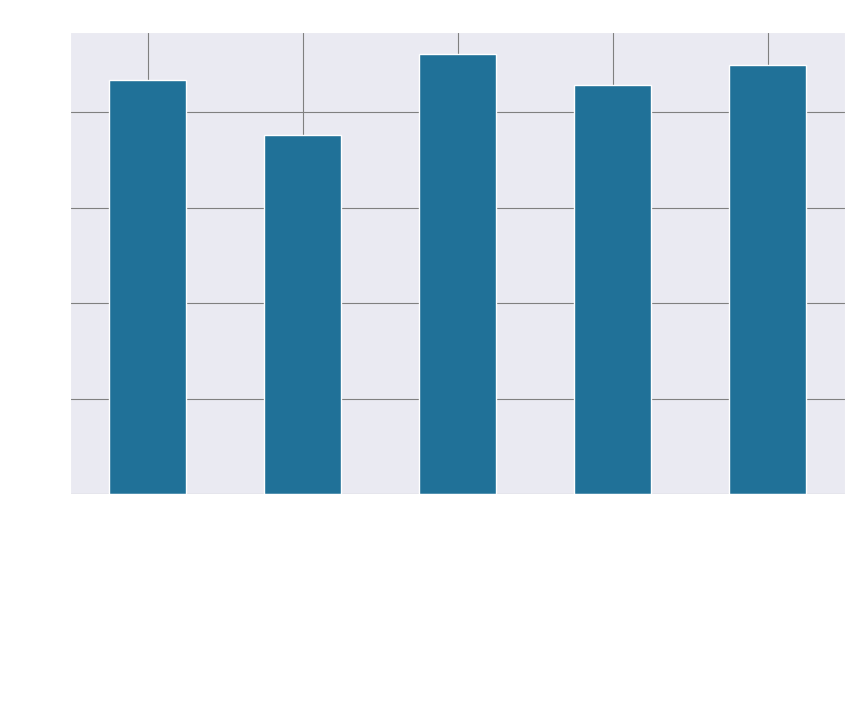

In [13]:
campaigns = ['marketing_company_outcome_1',
             'marketing_company_outcome_2',
             'marketing_company_outcome_3',
             'marketing_company_outcome_4',
             'marketing_company_outcome_5',
             ]
avg_outcomes = inter_df[campaigns].mean()

plt.figure(figsize=(10, 6))
avg_outcomes.plot(kind='bar', color=accent_color)
plt.title('Эффективность маркетинговых кампаний')
plt.xlabel('Маркетинговая кампания')
plt.ylabel('Средний результат')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Средние значения посещений сайта и мобильного приложения

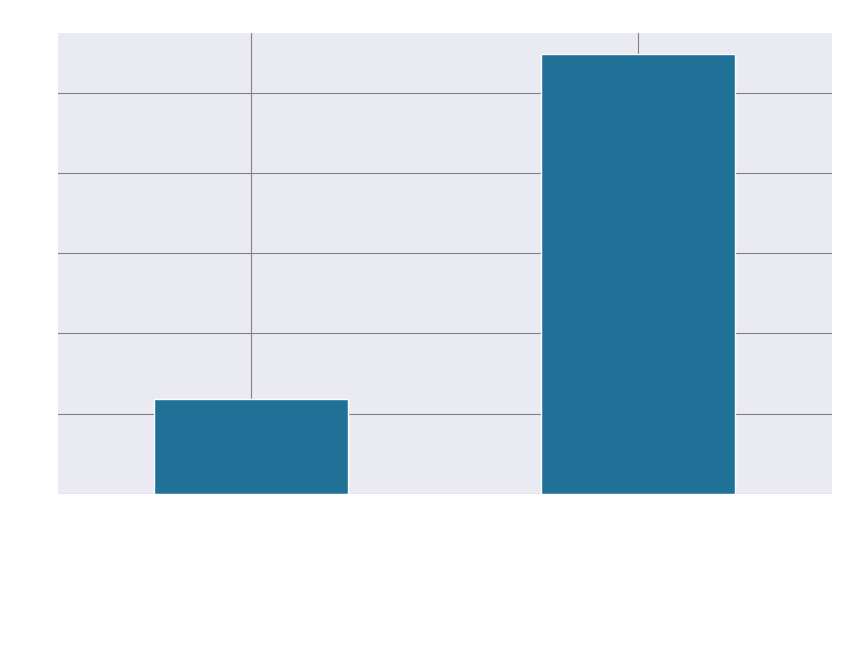

In [14]:
visit_counts = ['website_visit_count_avg', 'mobile_visit_count_avg']
avg_visits = inter_df[visit_counts].mean()

plt.figure(figsize=(10, 6))
avg_visits.plot(kind='bar', color=accent_color)
plt.title('Среднее количество посещений сайта и мобильного приложения')
plt.xlabel('Канал посещений')
plt.ylabel('Среднее количество посещений')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Users

In [15]:
url = 'https://docs.google.com/spreadsheets/d/1VFKmEuby217cgoONyxTxPrbAPusvPg0FJmpp_bNwjE8/edit?gid=336032657#gid=336032657'
users_url = convert_google_sheet_url(url)
users_url

'https://docs.google.com/spreadsheets/d/1VFKmEuby217cgoONyxTxPrbAPusvPg0FJmpp_bNwjE8/export?format=csv'

In [16]:
users_df = pd.read_csv(users_url)
users_df.head(5)

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,7f541f4f-921c-4d97-be52-15c379d2202e,2023-12-15 12:58:55,80.0,71597.0,0.0,0.0,single,phd
1,beca5469-1cdd-4fda-94c9-1412abc7160c,2023-04-16 5:15:30,79.0,130237.0,0.0,0.0,married,phd
2,7c450502-29be-47f0-b950-efe6dcb519a4,2022-06-23 7:48:10,77.0,91102.0,0.0,0.0,married,masters
3,04f3227f-7359-445e-bd9c-b7104c2ed405,2022-08-22 23:47:08,77.0,108637.0,0.0,0.0,single,masters
4,51065df7-a72d-4e01-810c-d930909ca382,2022-12-04 22:05:30,77.0,73948.0,0.0,0.0,divorced,phd


## Распределение возраста пользователей

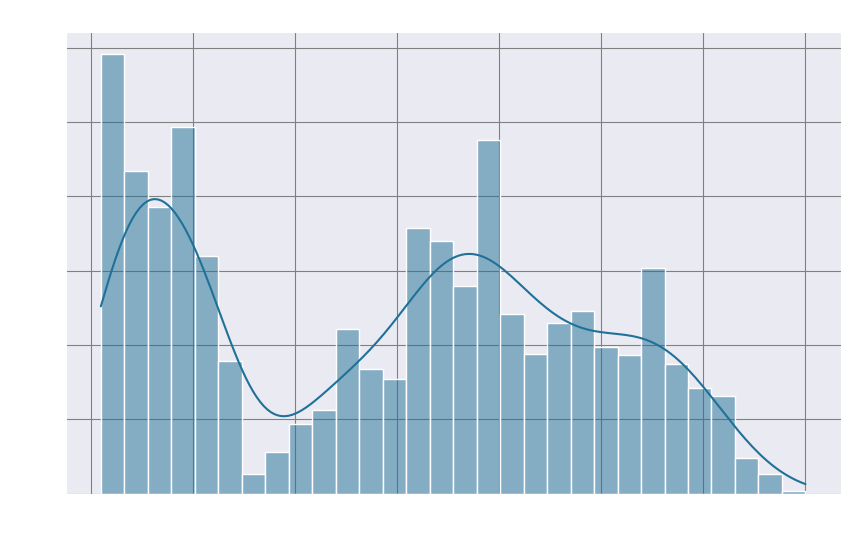

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='age', bins=30, color=accent_color, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

## График распределения дохода пользователей

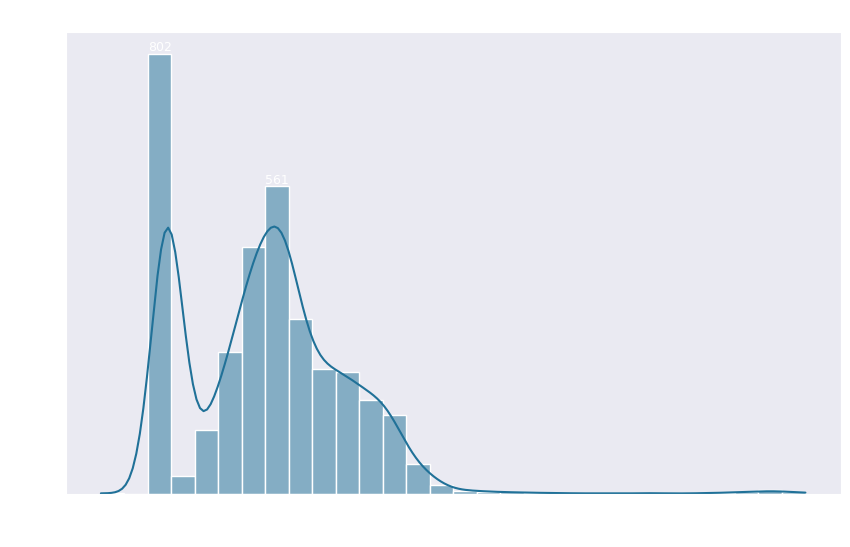

In [18]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=users_df, x='income', bins=30, color=accent_color, kde=True)
plt.title('Распределение дохода пользователей')
plt.xlabel('Доход')
plt.ylabel('Кол-во человек')
plt.grid(False)

heights = hist_plot.patches
height_values = [patch.get_height() for patch in heights]
max_height_indices = sorted(range(len(height_values)), key=lambda i: height_values[i], reverse=True)[:2]

# Аннотирование двух максимальных столбцов
for i in max_height_indices:
    plt.annotate(f'{height_values[i]:.0f}',
                 (heights[i].get_x() + heights[i].get_width() / 2, heights[i].get_height()),
                 ha='center', va='bottom', size=9)

plt.show()

## Среднее количество детей и подростков

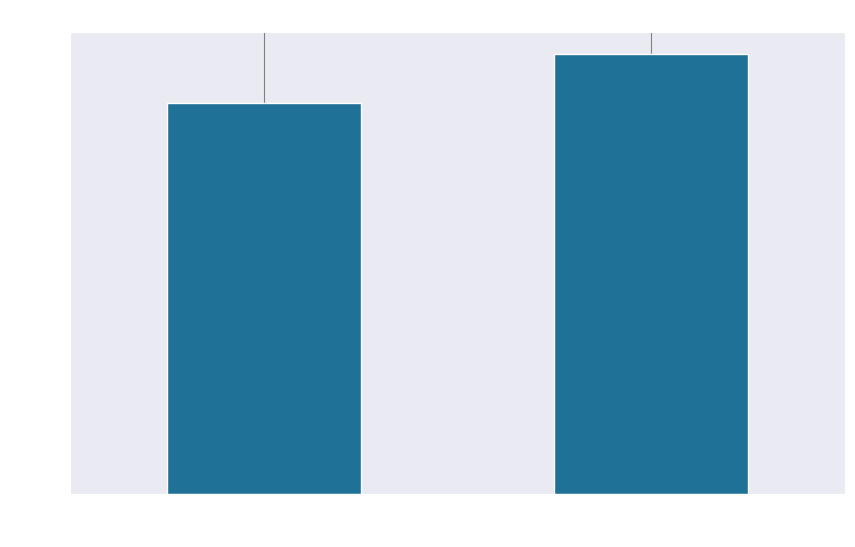

In [19]:
kids_teenagers = ['kids', 'teenagers']
avg_kids_teenagers = users_df[kids_teenagers].mean()

plt.figure(figsize=(10, 6))
avg_kids_teenagers.plot(kind='bar', color=accent_color)
plt.title('Среднее количество детей и подростков')
plt.xlabel('Категория')
plt.ylabel('Среднее количество') # TODO: оно должно быть в инт
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Orders

In [20]:
url = 'https://docs.google.com/spreadsheets/d/1AV8sG4x2gjB_LgTCIX4aVBq6ivfk4yzEB6uLbdth-fk/edit?gid=1228978267#gid=1228978267'
orders_url = convert_google_sheet_url(url)
orders_url

'https://docs.google.com/spreadsheets/d/1AV8sG4x2gjB_LgTCIX4aVBq6ivfk4yzEB6uLbdth-fk/export?format=csv'

In [21]:
orders_df = pd.read_csv(orders_url)
orders_df.head(5)

,userid,category,avg_bill
0,edd7efd1-ef27-4163-857b-eb4e3cdc5e54,alcohol,-10.0
1,b8fd098f-3ff4-4062-a13a-a19f63546ae3,alcohol,-10.0
2,e76b01da-61df-47e5-bf69-31497f6e386a,alcohol,-10.0
3,bc821c4a-74e3-4c20-a9e6-cb4110cc7e2f,alcohol,-10.0
4,5e5bec92-1b9d-49b3-8b52-b7657947ca2e,alcohol,-10.0


## Средний чек по категории

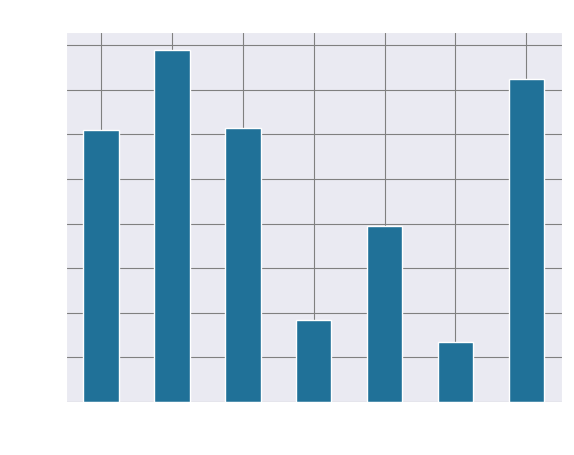

In [22]:
grouped = orders_df.groupby('category')['avg_bill'].mean()
grouped.plot(kind='bar', xlabel='Категория', ylabel='Средний чек', title='Средний чек по категории', color=accent_color)
plt.xticks(rotation=0)
plt.show()

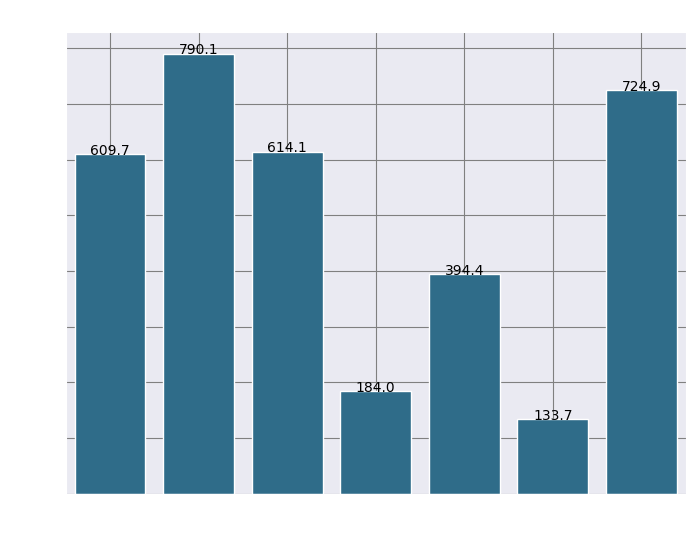

In [23]:
grouped = orders_df.groupby('category')['avg_bill'].mean().reset_index()

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='category', y='avg_bill', data=grouped, color=accent_color)

for index, row in grouped.iterrows():
    barplot.text(row.name, row.avg_bill, round(row.avg_bill, 1), color='black', ha="center", fontsize=10)

plt.xlabel('Категория')
plt.ylabel('Средний чек')
plt.title('Средний чек по категории')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Общее

## ТАБЛИЦА С ДУБЛИКАТАМИ USERID (merged_data)

In [24]:
userdata = pd.read_csv(users_url, na_values=['', 'NA', '-', 'NaN'])
orderdata = pd.read_csv(orders_url, na_values=['', 'NA', '-', 'NaN'])
interactiondata = pd.read_csv(interaction_url, na_values=['', 'NA', '-', 'NaN'])

merged_data = userdata.merge(orderdata, on='userid', how='left')
merged_data = merged_data.merge(interactiondata, on='userid', how='left')

In [25]:
merged_data['join_datetime'] = pd.to_datetime(merged_data['join_datetime'])

In [26]:
merged_data['join_date'] = merged_data['join_datetime'].dt.date
merged_data['join_time'] = merged_data['join_datetime'].dt.time

In [27]:
merged_data.shape[0]

23840

## ТАБЛИЦА БЕЗ ПОВТОРОВ USERID (mdwr)

In [28]:
userdata_ = pd.read_csv(users_url, na_values=['', 'NA', '-', 'NaN'])
orderdata_ = pd.read_csv(orders_url, na_values=['', 'NA', '-', 'NaN'])
interactiondata_ = pd.read_csv(interaction_url, na_values=['', 'NA', '-', 'NaN'])

mdwr = userdata_.merge(orderdata_, on='userid', how='left')
mdwr = mdwr.merge(interactiondata_, on='userid', how='left')

mdwr = mdwr.drop_duplicates(subset=['userid'])

In [29]:
mdwr['join_datetime'] = pd.to_datetime(mdwr['join_datetime'])

In [30]:
mdwr['join_date'] = mdwr['join_datetime'].dt.date
mdwr['join_time'] = mdwr['join_datetime'].dt.time

In [31]:
mdwr.shape[0]

3406

## Вычисление среднего количества детей по возрасту

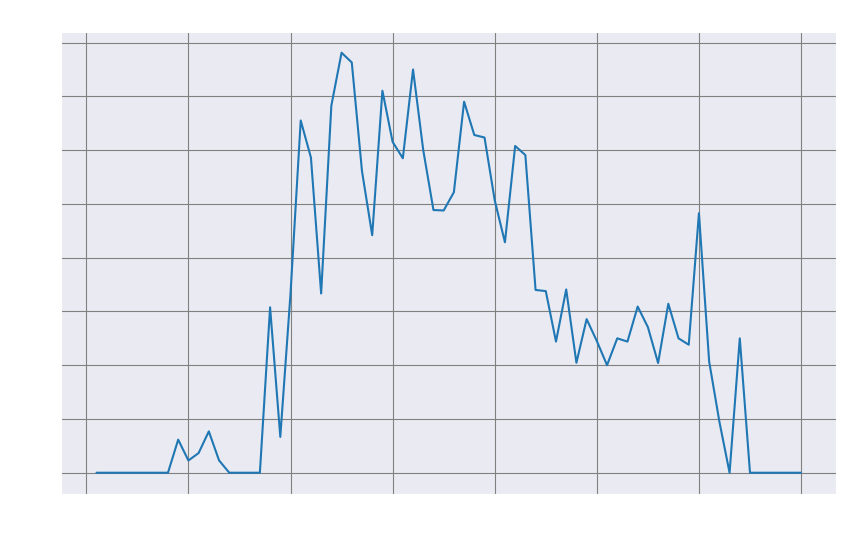

In [32]:
average_kids_by_age = mdwr.groupby('age')['kids'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_kids_by_age.index, average_kids_by_age.values)
plt.xlabel('Возраст')
plt.ylabel('Среднее число детей')
plt.title('Среднее число детей по возрасту клиентов')
plt.grid(True)
plt.show()

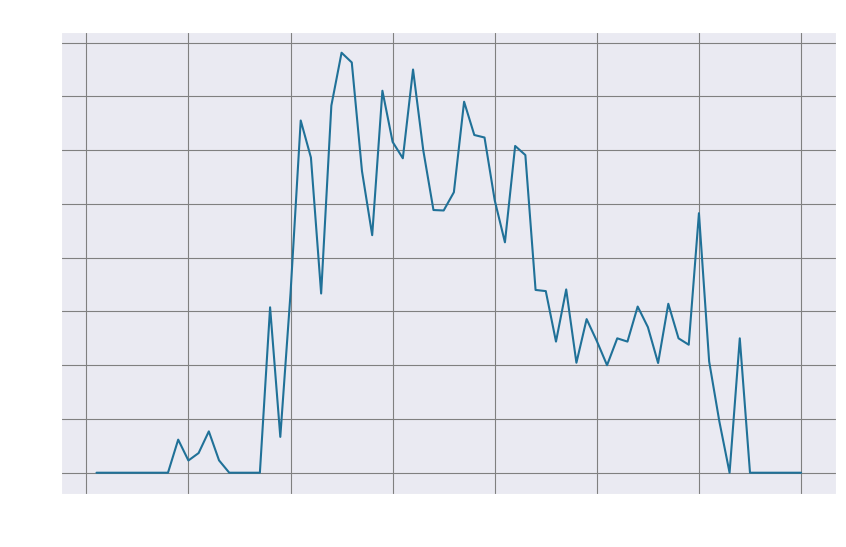

In [33]:
average_kids_by_age = mdwr.groupby('age')['kids'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='kids', data=average_kids_by_age, color=accent_color)

plt.xlabel('Возраст')
plt.ylabel('Среднее число детей')
plt.title('Среднее число детей по возрасту клиентов')
plt.grid(True)
plt.show()

## Вычисление процента клиентов с детьми в каждой возрастной группе

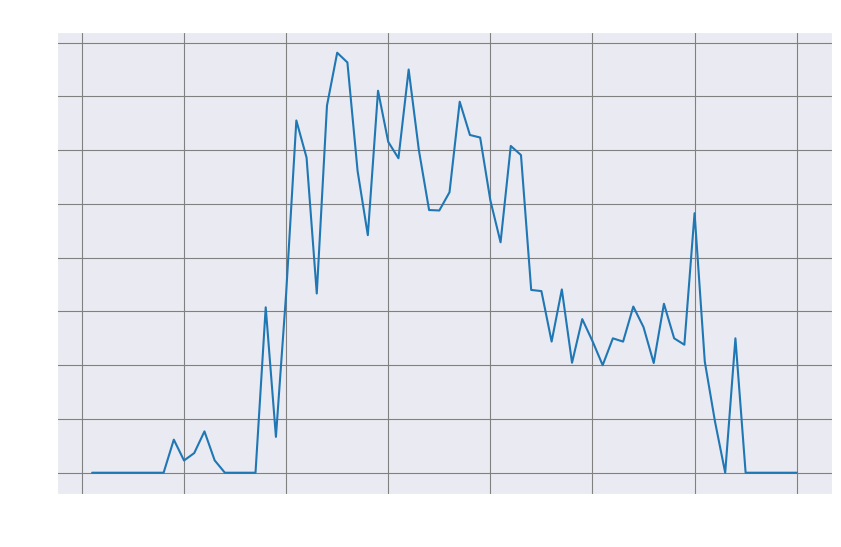

In [34]:
grouped_data = merged_data.groupby('age')['kids'].agg(['count', 'sum'])
grouped_data['percentage_with_kids'] = grouped_data['sum'] / grouped_data['count'] * 100

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['percentage_with_kids'])
plt.xlabel('Возраст')
plt.ylabel('Процент клиентов с детьми (%)')
plt.title('Процент клиентов с детьми по возрасту')
plt.grid(True)
plt.show()

## Прибыль по возрастным группам клиентов

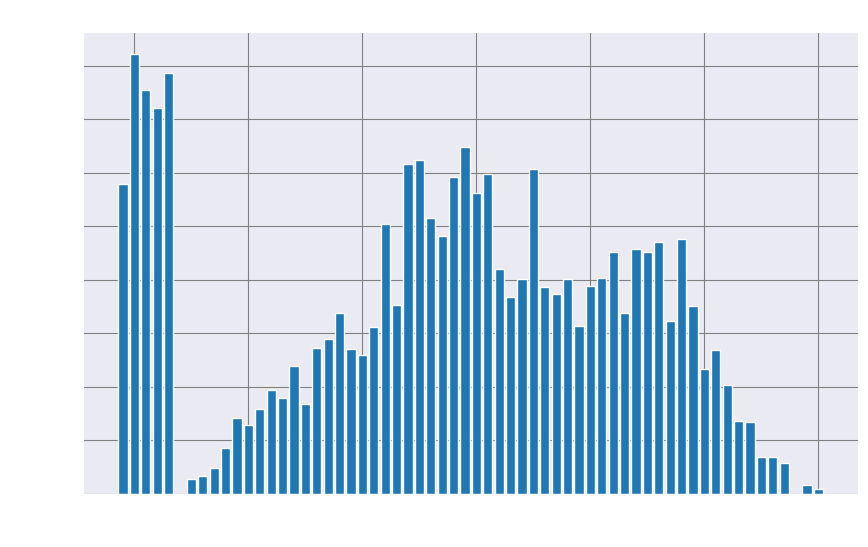

In [35]:
# Вычисление прибыли для каждого заказа
income = mdwr.loc[mdwr['avg_bill'] >= 0]

profit_by_age = income.groupby('age')['avg_bill'].sum()

plt.figure(figsize=(10, 6))
plt.bar(profit_by_age.index, profit_by_age.values)
plt.xlabel('Возраст')
plt.ylabel('Прибыль')
plt.title('Прибыль по возрастным группам клиентов')
plt.grid(True)
plt.show()

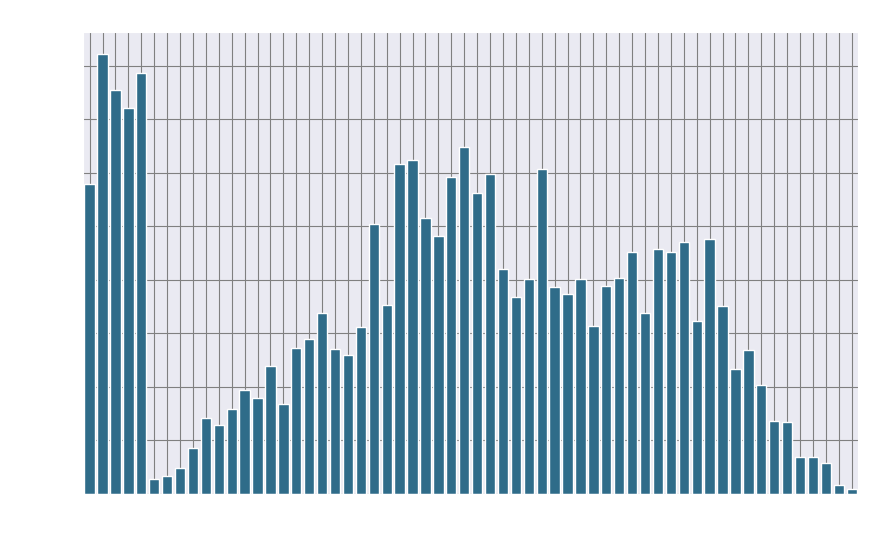

In [36]:
pba_df = pd.DataFrame(profit_by_age)

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='avg_bill', data=pba_df, color=accent_color)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

In [37]:
profit_by_age

age
19.0    57915.0
20.0    82240.0
21.0    75377.0
22.0    72168.0
23.0    78603.0
25.0     2717.0
26.0     3232.0
27.0     4767.0
28.0     8548.0
29.0    14219.0
30.0    12848.0
31.0    15846.0
32.0    19374.0
33.0    17838.0
34.0    23894.0
35.0    16679.0
36.0    27269.0
37.0    28898.0
38.0    33828.0
39.0    27068.0
40.0    25961.0
41.0    31214.0
42.0    50447.0
43.0    35293.0
44.0    61652.0
45.0    62288.0
46.0    51554.0
47.0    48105.0
48.0    59165.0
49.0    64713.0
50.0    56283.0
51.0    59814.0
52.0    42057.0
53.0    36858.0
54.0    40071.0
55.0    60751.0
56.0    38701.0
57.0    37303.0
58.0    40128.0
59.0    31282.0
60.0    38868.0
61.0    40402.0
62.0    45139.0
63.0    33704.0
64.0    45663.0
65.0    45139.0
66.0    46969.0
67.0    32241.0
68.0    47574.0
69.0    35041.0
70.0    23269.0
71.0    26872.0
72.0    20245.0
73.0    13628.0
74.0    13483.0
75.0     6942.0
76.0     6882.0
77.0     5714.0
79.0     1585.0
80.0      791.0
Name: avg_bill, dtype: float64

## Воздействие маркетинговой компании по возрастным группам

In [38]:
mark_age_data = mdwr[['age', 'marketing_company_outcome_1', 'marketing_company_outcome_2', 'marketing_company_outcome_3', 'marketing_company_outcome_4', 'marketing_company_outcome_5']]

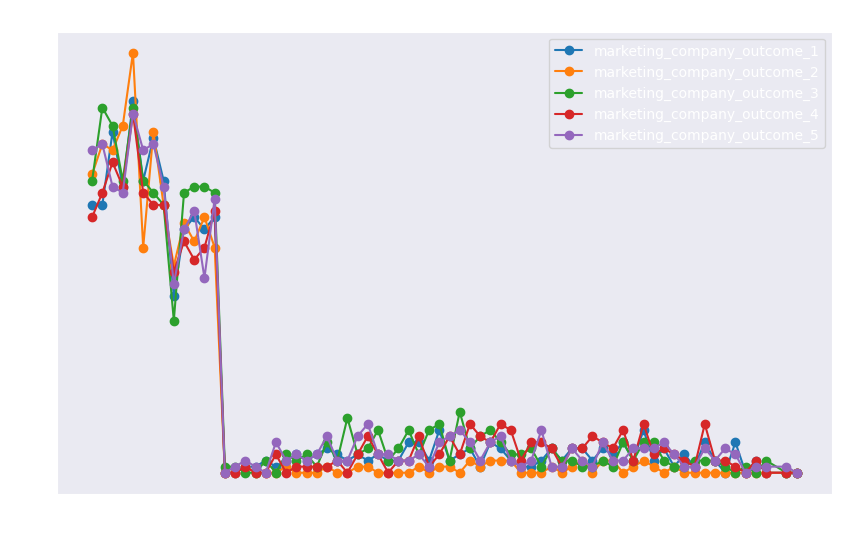

In [39]:
outcome_by_age = mark_age_data.groupby('age').sum()

plt.figure(figsize=(10, 6))
for column in outcome_by_age.columns:
    plt.plot(outcome_by_age.index, outcome_by_age[column], marker='o', label=column)

plt.xlabel('Возраст')
plt.ylabel('Сумма исходов маркетинговой компании')
plt.title('Воздействие маркетинговой компании по возрастным группам')
plt.legend()
plt.grid(False)
plt.show()

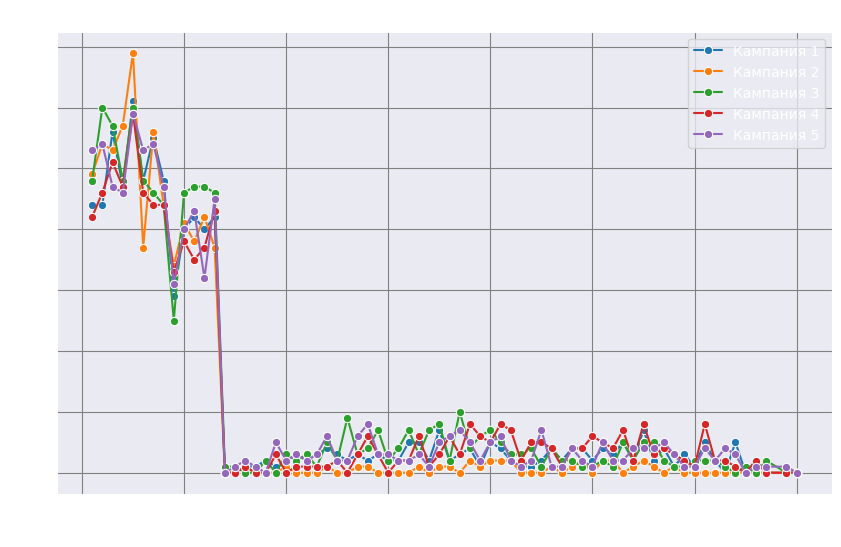

In [40]:
outcome_by_age = mark_age_data.groupby('age').sum()

plt.figure(figsize=(10, 6))

# Цикл по всем столбцам, кроме 'age'
for idx, column in enumerate(outcome_by_age.columns):
    sns.lineplot(data=outcome_by_age, x=outcome_by_age.index, y=outcome_by_age[column], marker='o', label=f'Кампания {idx + 1}')

plt.xlabel('Возраст')
plt.ylabel('Сумма исходов маркетинговой компании')
plt.title('Воздействие маркетинговой кампании по возрастным группам')
plt.legend()
plt.grid(True)
plt.show()

## Отток



In [41]:
mdwr.shape[0]

3406

In [42]:
mdf = mdwr

mdf['join_date'] = pd.to_datetime(mdf['join_date'])
mdf['last_order_dt'] = pd.to_datetime(mdf['last_order_dt'])

mdf['days_since_last_order'] = (current_date - mdf['last_order_dt']).dt.days
mdf['churn'] = mdf['days_since_last_order'] > 31  # Порог 31 день для оттока

mdf[['userid', 'join_date', 'last_order_dt', 'churn']]

,userid,join_date,last_order_dt,churn
0,7f541f4f-921c-4d97-be52-15c379d2202e,2023-12-15,2024-06-29,False
7,beca5469-1cdd-4fda-94c9-1412abc7160c,2023-04-16,NaT,False
14,7c450502-29be-47f0-b950-efe6dcb519a4,2022-06-23,2024-05-21,True
21,04f3227f-7359-445e-bd9c-b7104c2ed405,2022-08-22,2024-06-26,False
28,51065df7-a72d-4e01-810c-d930909ca382,2022-12-04,2024-06-29,False
...,...,...,...,...
23807,966e8b9d-f11b-455f-b9ff-500fc4cdeb58,2024-05-11,2024-06-08,True
23814,12d1b5f5-b193-495f-b3ba-96fd19fe8be8,2024-05-14,2024-05-20,True
23821,c37a044e-1b9e-4f8c-b14e-d9f5c19067d1,2024-05-17,2024-06-11,True
23828,14789b33-3207-4ed7-a429-ed18fe43d750,2024-06-03,2024-06-21,False


In [43]:
mdf = mdwr
mdf['join_date'] = pd.to_datetime(mdf['join_date'])
mdf['last_order_dt'] = pd.to_datetime(mdf['last_order_dt'])
mdf['days_since_last_order'] = (current_date - mdf['last_order_dt']).dt.days

mdf['churn'] = (mdf['days_since_last_order'] > 31) & ((current_date - mdf['join_date']).dt.days > 365)

# print(mdf[['userid', 'join_date', 'last_order_dt', 'churn']])

In [44]:
total_rows = mdf.shape[0]
false_count = mdf['churn'].value_counts()[False]

print(f"Процент оттока: {1 - (false_count/total_rows)} \n(отток {total_rows-false_count} пользователей) \nRetention: {false_count/total_rows}")

Процент оттока: 0.14885496183206104 
(отток 507 пользователей) 
Retention: 0.851145038167939


In [45]:
total_rows

3406

In [46]:
false_count

2899

# Сервисы

## Разделение датасета

In [47]:
df_25_less = mdwr[mdwr['age'] <= 25]  # Все строки с age <= 25
df_25_above = mdwr[mdwr['age'] > 25]    # Все строки с age > 25

In [48]:
df_25_less.head(3)

,userid,join_datetime,age,income,kids,teenagers,marital,education,category,avg_bill,...,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,join_date,join_time,days_since_last_order,churn
15386,be5325d7-d58b-4434-a023-320d4cd1c232,2022-06-14 07:02:05,25.0,116559.0,0.0,0.0,single,NaN,alcohol,836.0,...,11.0,0.0,0.0,1.0,0.0,1.0,2022-06-14,07:02:05,55.0,True
15393,69b5cedf-9caa-4eac-9903-ee61cdabb2e7,2022-06-23 22:19:09,25.0,99628.0,0.0,0.0,single,bachelor,alcohol,987.0,...,27.0,0.0,0.0,0.0,0.0,0.0,2022-06-23,22:19:09,12.0,False
15400,7b74b8e0-8d49-407a-a24c-5a23a599997f,2022-09-13 12:16:12,25.0,59824.0,0.0,0.0,single,bachelor,alcohol,-10.0,...,38.0,0.0,0.0,0.0,0.0,0.0,2022-09-13,12:16:12,10.0,False


In [49]:
df_25_above.head(3)

,userid,join_datetime,age,income,kids,teenagers,marital,education,category,avg_bill,...,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,join_date,join_time,days_since_last_order,churn
0,7f541f4f-921c-4d97-be52-15c379d2202e,2023-12-15 12:58:55,80.0,71597.0,0.0,0.0,single,phd,alcohol,791.0,...,34.0,0.0,0.0,0.0,0.0,0.0,2023-12-15,12:58:55,15.0,False
7,beca5469-1cdd-4fda-94c9-1412abc7160c,2023-04-16 05:15:30,79.0,130237.0,0.0,0.0,married,phd,alcohol,1585.0,...,-3.0,0.0,0.0,0.0,0.0,1.0,2023-04-16,05:15:30,NaN,False
14,7c450502-29be-47f0-b950-efe6dcb519a4,2022-06-23 07:48:10,77.0,91102.0,0.0,0.0,married,masters,alcohol,929.0,...,36.0,0.0,0.0,0.0,0.0,0.0,2022-06-23,07:48:10,54.0,True


In [50]:
df_25_above.columns

Index(['userid', 'join_datetime', 'age', 'income', 'kids', 'teenagers',
       'marital', 'education', 'category', 'avg_bill', 'complain_count',
       'last_order_dt', 'discount_purchases_count_avg',
       'catalogue_purchases_count_avg', 'store_purchases_count_avg',
       'website_purchases_count_avg', 'website_visit_count_avg',
       'mobile_purchases_count_avg', 'mobile_visit_count_avg',
       'marketing_company_outcome_1', 'marketing_company_outcome_2',
       'marketing_company_outcome_3', 'marketing_company_outcome_4',
       'marketing_company_outcome_5', 'join_date', 'join_time',
       'days_since_last_order', 'churn'],
      dtype='object')

In [51]:
df_25_less.shape[0]

1207

In [52]:
df_25_above.shape[0]

2198

In [53]:
df_25_above['website_purchases_count_avg']

0        3
7        7
14       5
21       7
28       7
        ..
15351    6
15358    2
15365    2
15372    6
15379    7
Name: website_purchases_count_avg, Length: 2198, dtype: object

## Использование сервиса (группа до 25] лет)

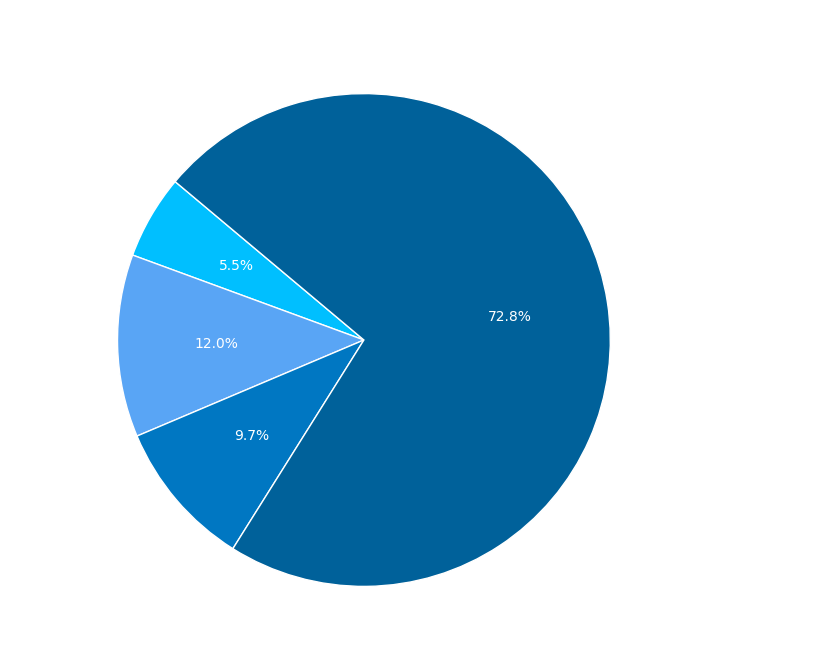

In [54]:
df_25_less.loc[:, 'website_purchases_count_avg'] = pd.to_numeric(df_25_less['website_purchases_count_avg'], errors='coerce').fillna(0)

avg_values_25_less = {
    'Онлайн-каталог': df_25_less['catalogue_purchases_count_avg'].mean(),
    'Магазин': df_25_less['store_purchases_count_avg'].mean(),
    'Веб-сайт': df_25_less['website_purchases_count_avg'].mean(),
    'Мобильное приложение': df_25_less['mobile_purchases_count_avg'].mean()
}

labels = list(avg_values_25_less.keys())
sizes = list(avg_values_25_less.values())


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=blue_pie_colors)
plt.title('Использование сервиса (группа до 25 лет)')
plt.show()

## Использование сервиса (группа (25+ лет)

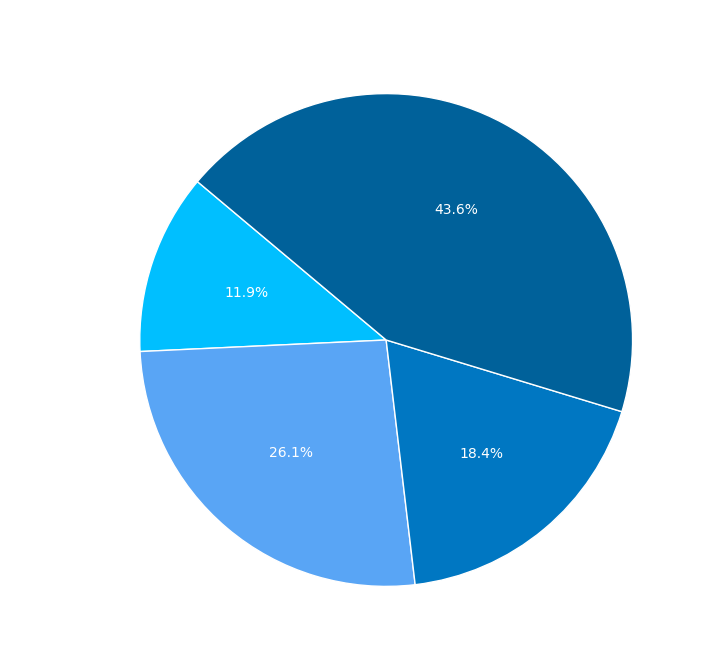

In [55]:
# df_25_above.loc[:, 'website_purchases_count_avg'] = pd.to_numeric(df_25_above['website_purchases_count_avg'], errors='coerce').fillna(0)
df_25_above = df_25_above.fillna(0)
cols = ['discount_purchases_count_avg', 'catalogue_purchases_count_avg', 'store_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg']

# Преобразование столбцов в числовые значения с заменой некорректных строк на NaN и затем на 0
for col in cols:
    df_25_above.loc[:, col] = pd.to_numeric(df_25_above[col], errors='coerce').fillna(0)




avg_values_25_above = {
    'Онлайн-каталог': df_25_above['catalogue_purchases_count_avg'].mean(),
    'Магазин': df_25_above['store_purchases_count_avg'].mean(),
    'Веб-сайт': df_25_above['website_purchases_count_avg'].mean(),
    'Мобильное приложение': df_25_above['mobile_purchases_count_avg'].mean()
}

labels = list(avg_values_25_above.keys())
sizes = list(avg_values_25_above.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=blue_pie_colors)
plt.title('Использование сервиса (группа 25+ лет)')
plt.show()

# Зарплаты и деньги

## Зарплата / возраст

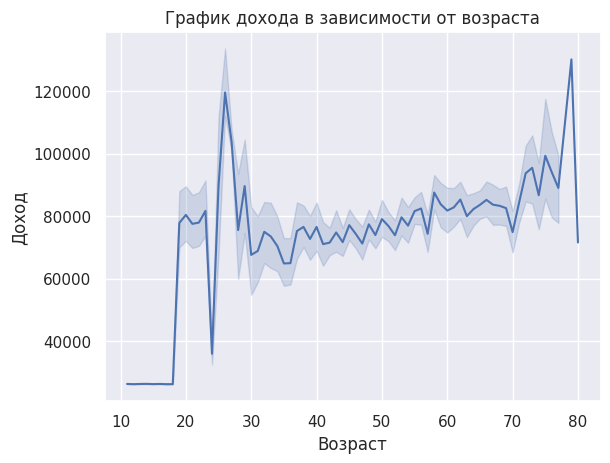

In [56]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="age", y="income", data=mdwr)

plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('График дохода в зависимости от возраста')

plt.show()

## Средний чек по возрасту

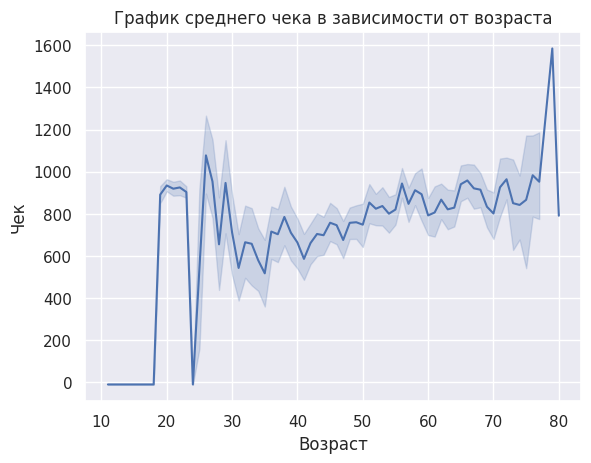

In [57]:
sns.lineplot(x="age", y="avg_bill", data=mdwr)

plt.xlabel('Возраст')
plt.ylabel('Чек')
plt.title('График среднего чека в зависимости от возраста')

plt.show()

## Кол-во покупок

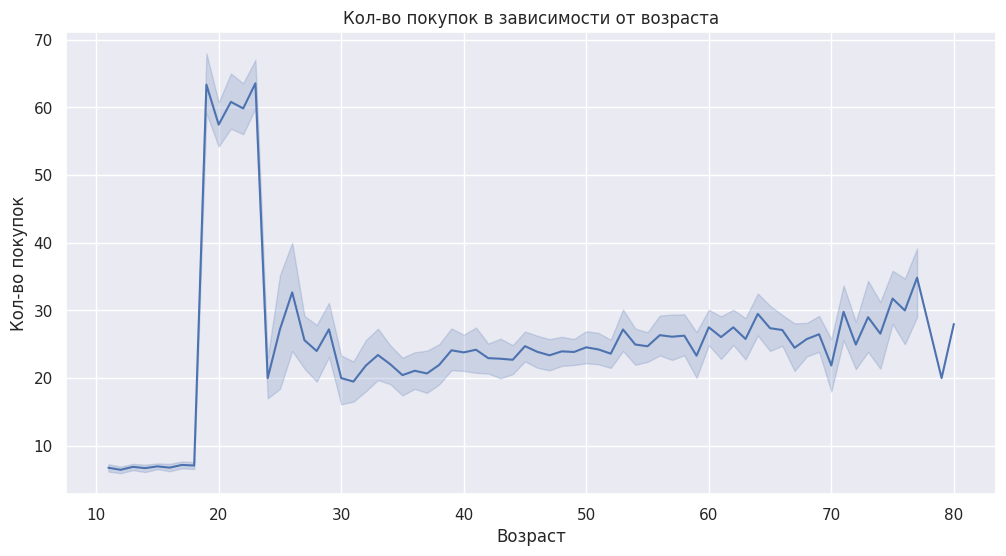

In [58]:
cols = ['discount_purchases_count_avg', 'catalogue_purchases_count_avg', 'store_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg']

for col in cols:
  mdwr.loc[:, col] = pd.to_numeric(mdwr[col], errors='coerce').fillna(0)


plt.figure(figsize=(12, 6))
mdwr['total_purchases'] = mdwr[cols].sum(axis=1)
sns.lineplot(x="age", y="total_purchases", data=mdwr)

plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Кол-во покупок в зависимости от возраста')

plt.show()

# Семейное положение

## Семейное положение / кол-во покупок

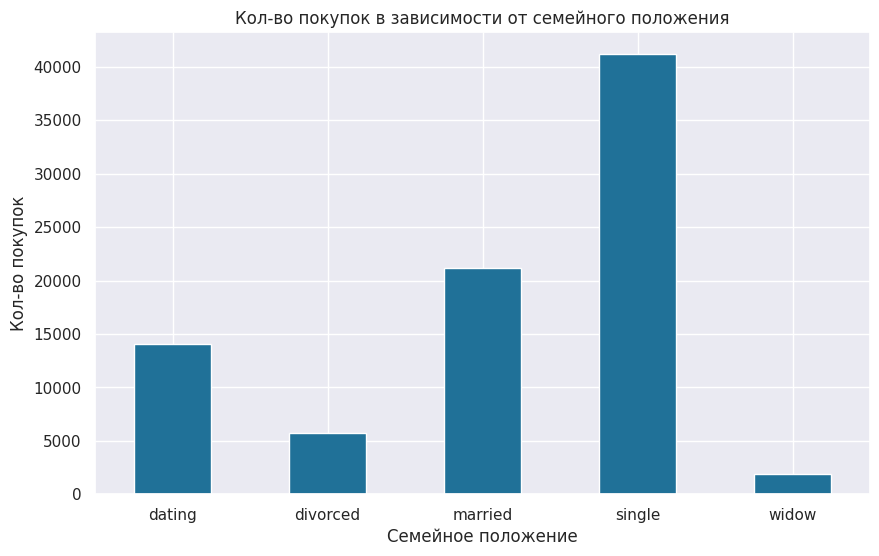

In [59]:
cols = ['discount_purchases_count_avg', 'catalogue_purchases_count_avg',
        'store_purchases_count_avg', 'website_purchases_count_avg',
        'mobile_purchases_count_avg']

mdwr['total_purchases'] = mdwr[cols].sum(axis=1)
purchase_by_marital = mdwr.groupby('marital')['total_purchases'].sum()

plt.figure(figsize=(10, 6))
purchase_by_marital.plot(kind='bar', color=accent_color)
plt.xlabel('Семейное положение')
plt.ylabel('Кол-во покупок')
plt.title('Кол-во покупок в зависимости от семейного положения')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

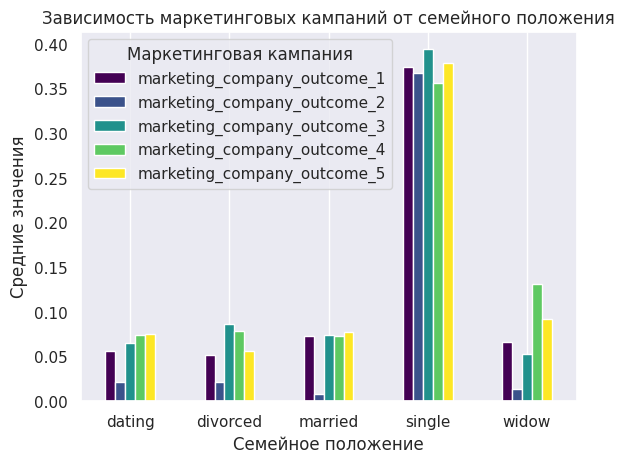

In [60]:
marketing_cols = ['marketing_company_outcome_1', 'marketing_company_outcome_2',
                  'marketing_company_outcome_3', 'marketing_company_outcome_4',
                  'marketing_company_outcome_5']

# Группировка данных по семейному положению и вычисление средних значений по каждой кампании
marketing_by_marital = mdwr.groupby('marital')[marketing_cols].mean()

# Построение графика
plt.figure(figsize=(10, 6))
marketing_by_marital.plot(kind='bar', cmap='viridis')
plt.xlabel('Семейное положение')
plt.ylabel('Средние значения')
plt.title('Зависимость маркетинговых кампаний от семейного положения')
plt.xticks(rotation=0)
plt.legend(title='Маркетинговая кампания')
plt.grid(axis='y')

plt.show()

# Оргаинические и неорганические клиенты

## Разбиение на датафреймы

In [61]:
mdwr.shape[0]

3406

In [62]:
marketing_cols = ['marketing_company_outcome_1', 'marketing_company_outcome_2',
                  'marketing_company_outcome_3', 'marketing_company_outcome_4',
                  'marketing_company_outcome_5']

org_df = mdwr[(mdwr[marketing_cols] == 0).all(axis=1)]  # органические клиенты (все значения рекламных кампаний равны 0)
norg_df = mdwr[(mdwr[marketing_cols] != 0).any(axis=1)]  # неорганические клиенты (хотя бы одно значение рекламных кампаний не равно 0)

In [63]:
org_df.head(3)

,userid,join_datetime,age,income,kids,teenagers,marital,education,category,avg_bill,...,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,join_date,join_time,days_since_last_order,churn,total_purchases
0,7f541f4f-921c-4d97-be52-15c379d2202e,2023-12-15 12:58:55,80.0,71597.0,0.0,0.0,single,phd,alcohol,791.0,...,0.0,0.0,0.0,0.0,0.0,2023-12-15,12:58:55,15.0,False,28.0
14,7c450502-29be-47f0-b950-efe6dcb519a4,2022-06-23 07:48:10,77.0,91102.0,0.0,0.0,married,masters,alcohol,929.0,...,0.0,0.0,0.0,0.0,0.0,2022-06-23,07:48:10,54.0,True,34.0
35,8fbca4ab-e4d9-4c20-9f10-ca4b2ee7ea0a,2023-02-12 00:04:13,77.0,80518.0,0.0,0.0,widow,phd,alcohol,1035.0,...,0.0,0.0,0.0,0.0,0.0,2023-02-12,00:04:13,32.0,True,38.0


In [64]:
norg_df.head(3)

,userid,join_datetime,age,income,kids,teenagers,marital,education,category,avg_bill,...,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,join_date,join_time,days_since_last_order,churn,total_purchases
7,beca5469-1cdd-4fda-94c9-1412abc7160c,2023-04-16 05:15:30,79.0,130237.0,0.0,0.0,married,phd,alcohol,1585.0,...,0.0,0.0,0.0,0.0,1.0,2023-04-16,05:15:30,NaN,False,20.0
21,04f3227f-7359-445e-bd9c-b7104c2ed405,2022-08-22 23:47:08,77.0,108637.0,0.0,0.0,single,masters,alcohol,1493.0,...,0.0,0.0,0.0,0.0,1.0,2022-08-22,23:47:08,18.0,False,37.0
28,51065df7-a72d-4e01-810c-d930909ca382,2022-12-04 22:05:30,77.0,73948.0,0.0,0.0,divorced,phd,alcohol,737.0,...,0.0,0.0,1.0,0.0,0.0,2022-12-04,22:05:30,15.0,False,35.0


## По кол-ву покупок

### Органика

In [65]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='userid', y='total_purchases', data=org_df, hue='marital', dodge=True)
# plt.xlabel('Пользователи')
# plt.ylabel('Суммарные покупки')
# plt.title('Суммарные покупки органических клиентов по семейному положению')
# plt.xticks(rotation=45)
# plt.legend(title='Семейное положение')
# plt.tight_layout()
# plt.show()

### Неорганика

## По среднему чеку

### Органика

### Неорганика

## % семейное положение

### Органика

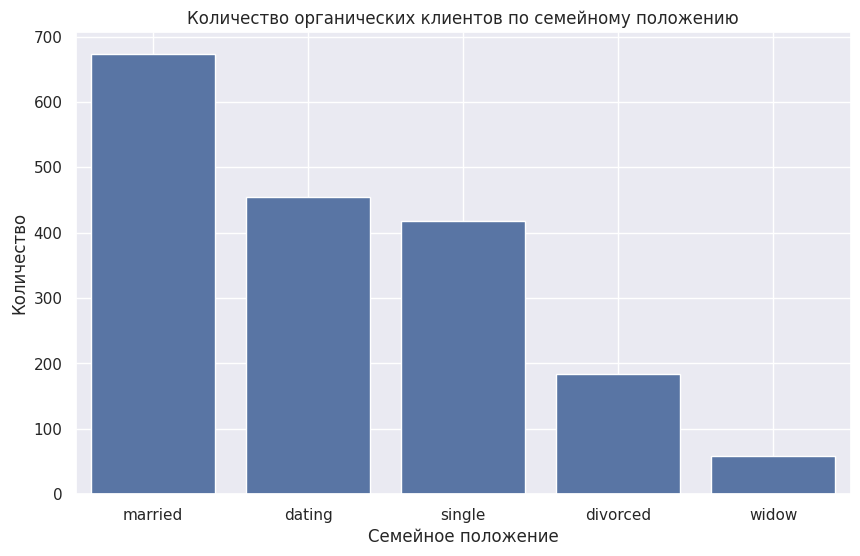

In [66]:
marital_counts = org_df['marital'].value_counts()

marital_counts_df = pd.DataFrame({'marital': marital_counts.index, 'count': marital_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='count', data=marital_counts_df)
plt.xlabel('Семейное положение')
plt.ylabel('Количество')
plt.title('Количество органических клиентов по семейному положению')
plt.grid(True)
plt.show()

### Неорганика

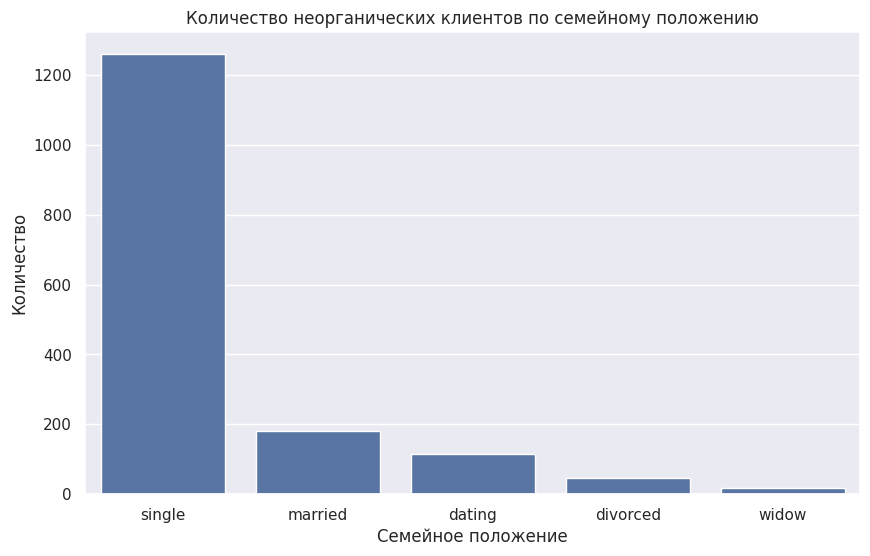

In [67]:
marital_counts = norg_df['marital'].value_counts()

marital_counts_df = pd.DataFrame({'marital': marital_counts.index, 'count': marital_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='count', data=marital_counts_df)
plt.xlabel('Семейное положение')
plt.ylabel('Количество')
plt.title('Количество неорганических клиентов по семейному положению')
plt.show()

## % по образованию

### Органика

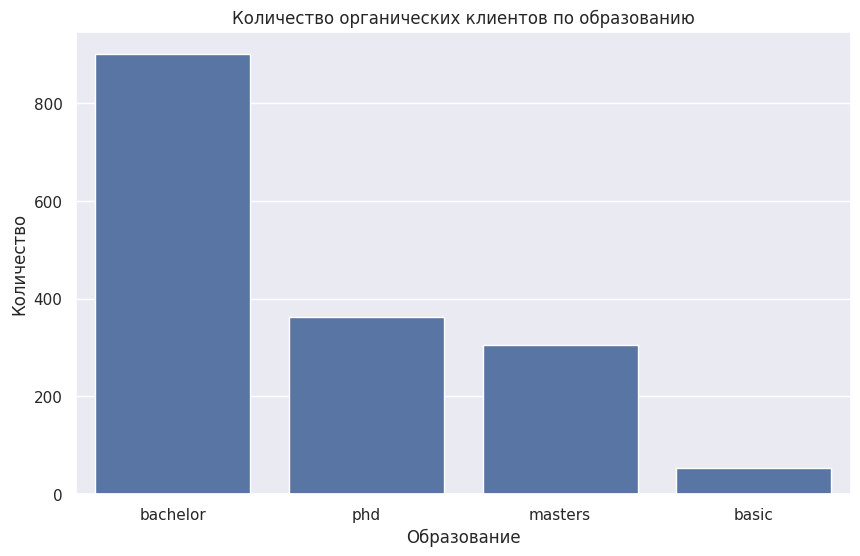

In [68]:
education_counts = org_df['education'].value_counts()

education_counts_df = pd.DataFrame({'education': education_counts.index, 'count': education_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='count', data=education_counts_df)
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.title('Количество органических клиентов по образованию')
plt.show()

### Неорганика

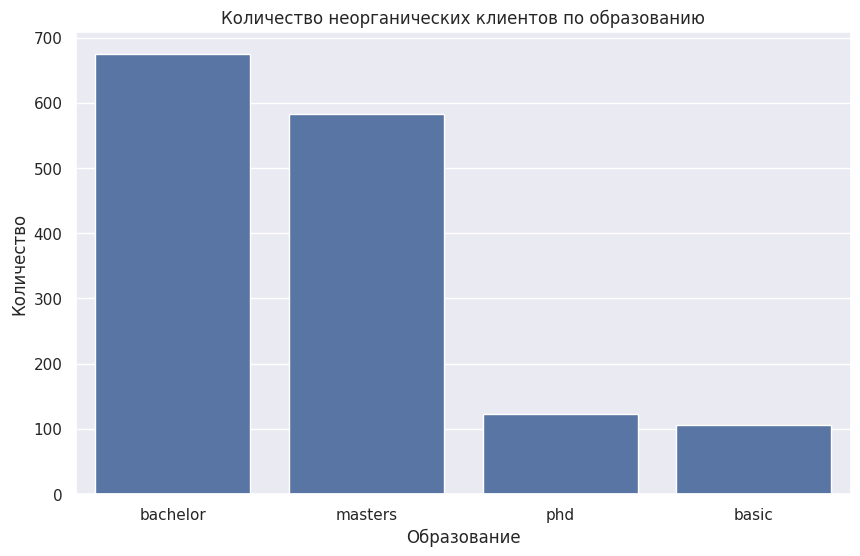

In [69]:
education_counts = norg_df['education'].value_counts()

education_counts_df = pd.DataFrame({'education': education_counts.index, 'count': education_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='count', data=education_counts_df)
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.title('Количество неорганических клиентов по образованию')
plt.show()

## Кол-во детей

### Органика

<ipython-input-70-6dcd6f64a36c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org_df['total_kids'] = org_df['kids'] + org_df['teenagers']


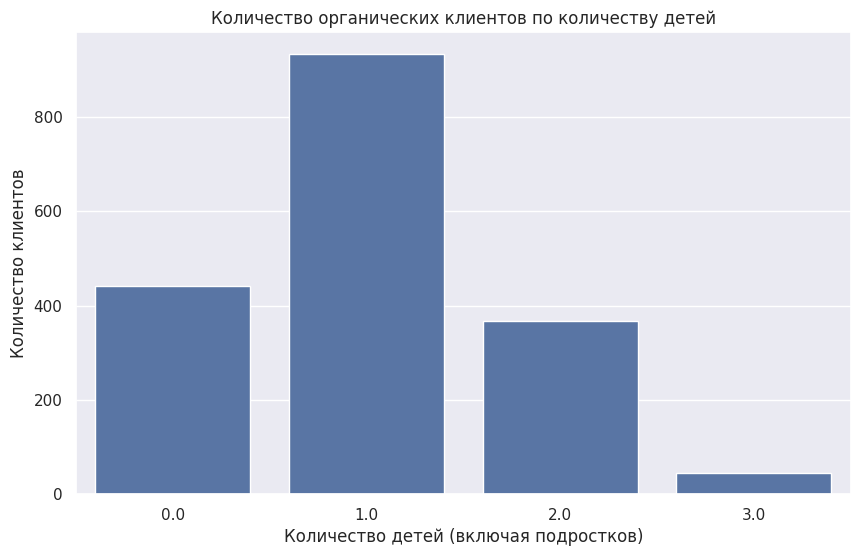

In [70]:
org_df['total_kids'] = org_df['kids'] + org_df['teenagers']

# Группируем данные по количеству детей и подсчитываем количество каждой категории
kids_counts = org_df['total_kids'].value_counts().sort_index()


kids_counts_df = pd.DataFrame({'total_kids': kids_counts.index, 'count': kids_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='total_kids', y='count', data=kids_counts_df)
plt.xlabel('Количество детей (включая подростков)')
plt.ylabel('Количество клиентов')
plt.title('Количество органических клиентов по количеству детей')
plt.show()

### Неорганика

<ipython-input-71-ac106f479316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norg_df['total_kids'] = norg_df['kids'] + norg_df['teenagers']


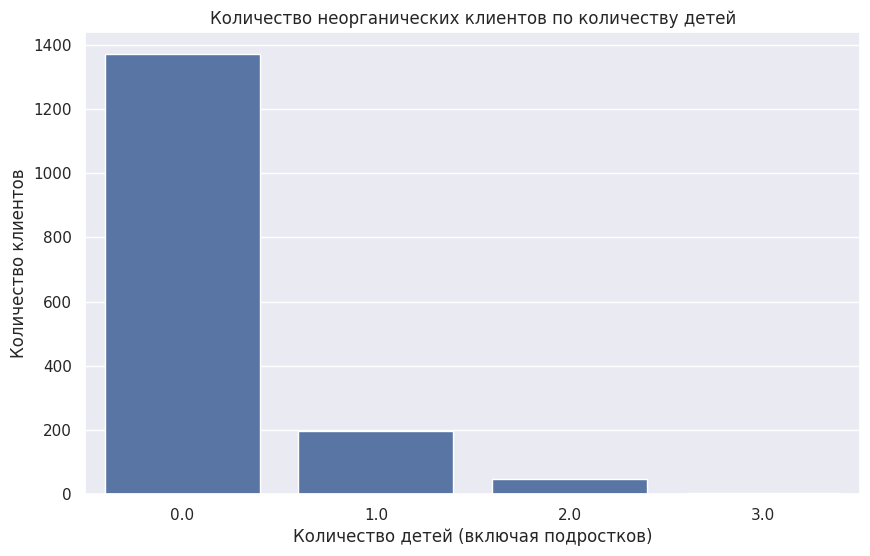

In [71]:
norg_df['total_kids'] = norg_df['kids'] + norg_df['teenagers']

# Группируем данные по количеству детей и подсчитываем количество каждой категории
kids_counts = norg_df['total_kids'].value_counts().sort_index()


kids_counts_df = pd.DataFrame({'total_kids': kids_counts.index, 'count': kids_counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='total_kids', y='count', data=kids_counts_df)
plt.xlabel('Количество детей (включая подростков)')
plt.ylabel('Количество клиентов')
plt.title('Количество неорганических клиентов по количеству детей')
plt.show()

#  ACL (avg customer live)

## Органика

In [72]:
org = org_df

org['join_date'] = pd.to_datetime(org['join_date'])
org['last_order_dt'] = pd.to_datetime(org['last_order_dt'])

org['acl'] = (org['last_order_dt'] - org['join_date']).dt.days

median_acl = org['acl'].median()
org['acl'] = org['acl'].fillna(median_acl)

org['acl']

<ipython-input-72-0c6d927a8d82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['join_date'] = pd.to_datetime(org['join_date'])
<ipython-input-72-0c6d927a8d82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['last_order_dt'] = pd.to_datetime(org['last_order_dt'])
<ipython-input-72-0c6d927a8d82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

0        197.0
14       698.0
35       486.0
49       320.0
77       482.0
         ...  
22309    296.0
22701    577.0
23233    757.0
23303    709.0
23597    273.0
Name: acl, Length: 1787, dtype: float64

In [73]:
org['acl'].mean()

376.37045327364297

## Неорганика

In [74]:
norg = norg_df

norg['join_date'] = pd.to_datetime(norg['join_date'])
norg['last_order_dt'] = pd.to_datetime(norg['last_order_dt'])

norg['acl'] = (norg['last_order_dt'] - norg['join_date']).dt.days

median_acl = norg['acl'].median()
norg['acl'] = norg['acl'].fillna(median_acl)

norg['acl']

<ipython-input-74-8cb7d0972516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norg['join_date'] = pd.to_datetime(norg['join_date'])
<ipython-input-74-8cb7d0972516>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norg['last_order_dt'] = pd.to_datetime(norg['last_order_dt'])
<ipython-input-74-8cb7d0972516>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

7        385.5
21       674.0
28       573.0
42       388.0
56       659.0
         ...  
23807     28.0
23814      6.0
23821     25.0
23828     18.0
23835    385.5
Name: acl, Length: 1619, dtype: float64

In [75]:
norg['acl'].mean()

391.75941939468805

## Общее

In [76]:
mdf['acl'] = (mdf['last_order_dt'] - mdf['join_date']).dt.days

median_acl = mdf['acl'].median()
mdf['acl'] = mdf['acl'].fillna(median_acl)

mdf['acl'].head(3)

0     197.0
7     377.0
14    698.0
Name: acl, dtype: float64

In [77]:
mdf['acl'].mean()

383.697592483852

In [78]:
merged_data.columns

Index(['userid', 'join_datetime', 'age', 'income', 'kids', 'teenagers',
       'marital', 'education', 'category', 'avg_bill', 'complain_count',
       'last_order_dt', 'discount_purchases_count_avg',
       'catalogue_purchases_count_avg', 'store_purchases_count_avg',
       'website_purchases_count_avg', 'website_visit_count_avg',
       'mobile_purchases_count_avg', 'mobile_visit_count_avg',
       'marketing_company_outcome_1', 'marketing_company_outcome_2',
       'marketing_company_outcome_3', 'marketing_company_outcome_4',
       'marketing_company_outcome_5', 'join_date', 'join_time'],
      dtype='object')

# Прибыль

In [79]:
orders_df['is_org'] = orders_df['userid'].isin(org_df['userid']).astype(bool)
orders_df

,userid,category,avg_bill,is_org
0,edd7efd1-ef27-4163-857b-eb4e3cdc5e54,alcohol,-10.0,False
1,b8fd098f-3ff4-4062-a13a-a19f63546ae3,alcohol,-10.0,False
2,e76b01da-61df-47e5-bf69-31497f6e386a,alcohol,-10.0,False
3,bc821c4a-74e3-4c20-a9e6-cb4110cc7e2f,alcohol,-10.0,False
4,5e5bec92-1b9d-49b3-8b52-b7657947ca2e,alcohol,-10.0,False
...,...,...,...,...
23830,5ce3e31e-60c1-46e2-9102-26e410767435,vegetables,985.0,False
23831,87dbdb17-a254-413a-86c3-5b5c73213687,vegetables,985.0,False
23832,dfc9879a-5e7e-47c3-848f-3222415be2f6,vegetables,985.0,False
23833,9f676556-b4ca-41f2-92df-01953ea284d6,vegetables,998.0,True


In [80]:
orders_df['avg_bill'].sum()/users_df.shape[0]

3394.7319436288903

In [81]:
org_orders_ = orders_df[orders_df['is_org'] == True]
org_orders_['avg_bill'].sum()/org_df.shape[0]

3381.724118634583

In [82]:
org_orders_ = orders_df[orders_df['is_org'] != True]
org_orders_['avg_bill'].sum()/norg_df.shape[0]

3409.08956145769

# Жалобы

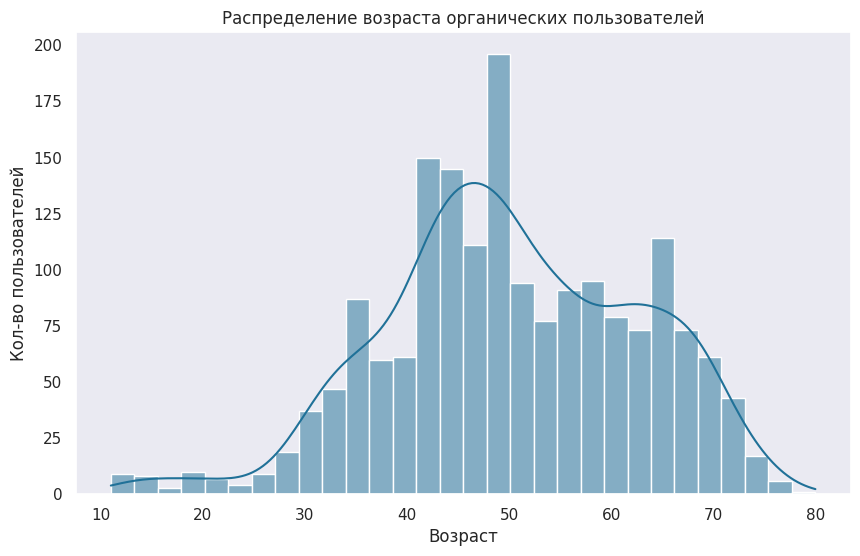

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data=org_df, x='age', bins=30, color=accent_color, kde=True)
plt.title('Распределение возраста органических пользователей')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.grid(False)
plt.show()

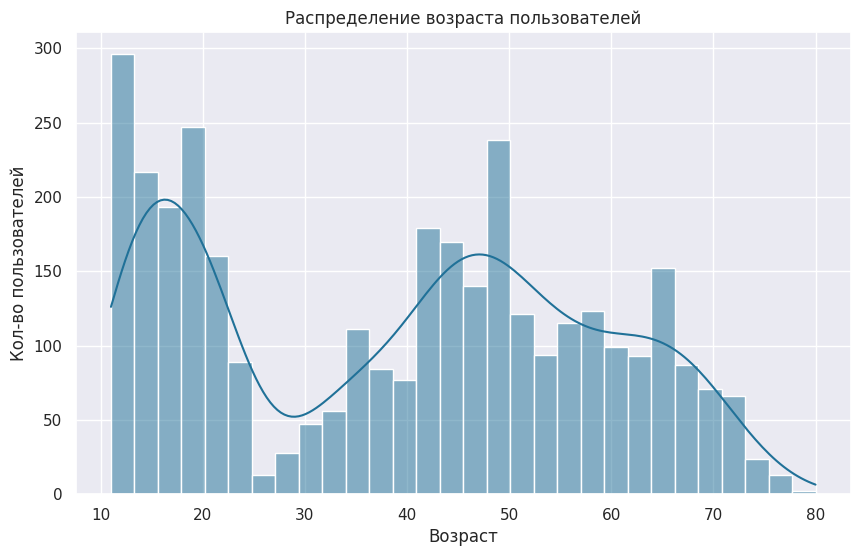

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='age', bins=30, color=accent_color, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

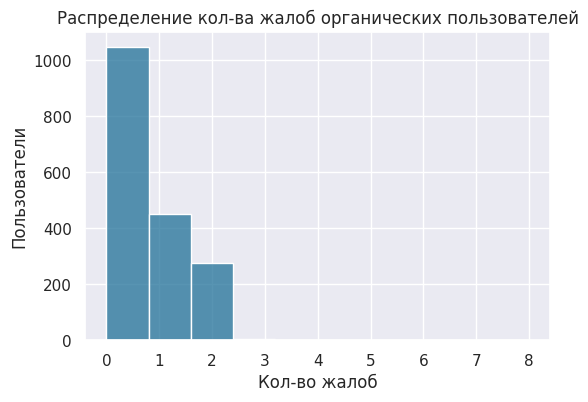

In [85]:
plt.figure(figsize=(6, 4))
sns.histplot(data=org_df, x='complain_count', bins=10, color=accent_color, edgecolors=None)
plt.title('Распределение кол-ва жалоб органических пользователей')
plt.xlabel('Кол-во жалоб')
plt.ylabel('Пользователи')
plt.grid(True)
plt.show()

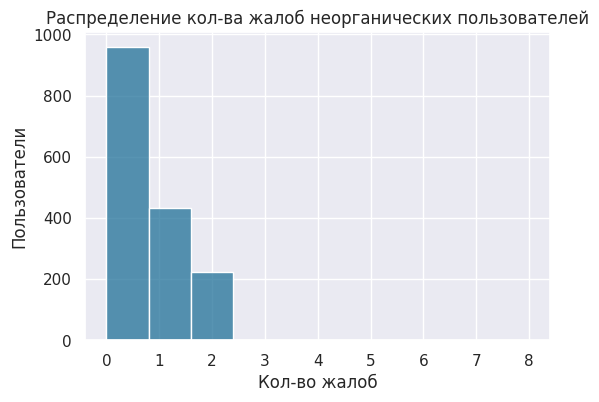

In [86]:
plt.figure(figsize=(6, 4))
sns.histplot(data=norg_df, x='complain_count', bins=10, color=accent_color, edgecolors=None)
plt.title('Распределение кол-ва жалоб неорганических пользователей')
plt.xlabel('Кол-во жалоб')
plt.ylabel('Пользователи')
plt.grid(True)
plt.show()

Процент жалоб от органических пользователей: 53.85%


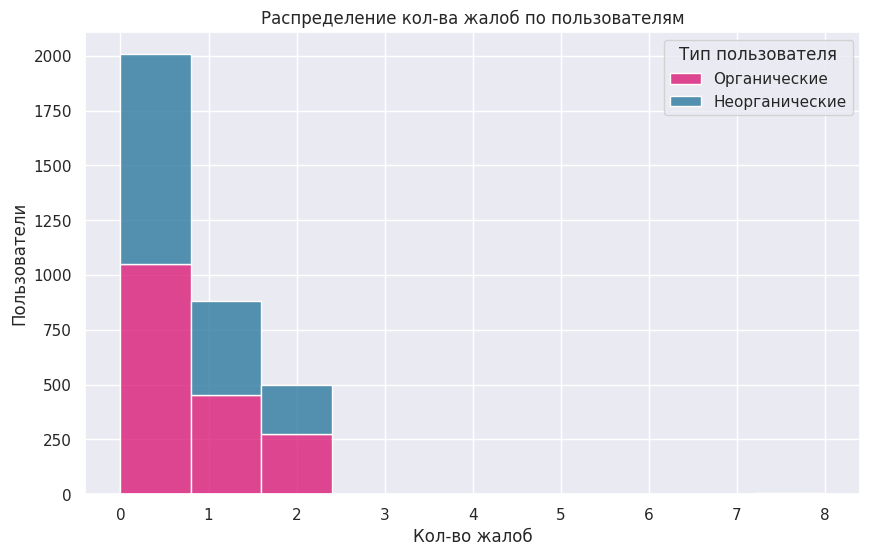

In [87]:
mdwr['is_org'] = mdwr['userid'].isin(org_df['userid'])

total_complaints = mdwr['complain_count'].sum()
org_complaints = mdwr[mdwr['is_org']]['complain_count'].sum()
org_complaints_percentage = (org_complaints / total_complaints) * 100

print(f"Процент жалоб от органических пользователей: {org_complaints_percentage:.2f}%")

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=mdwr, x='complain_count', hue='is_org', bins=10, multiple='stack', palette=[accent_color, accent_color2])
plt.title('Распределение кол-ва жалоб по пользователям')
plt.xlabel('Кол-во жалоб')
plt.ylabel('Пользователи')
plt.legend(title='Тип пользователя', labels=['Органические', 'Неорганические'])
plt.grid(True)
plt.show()

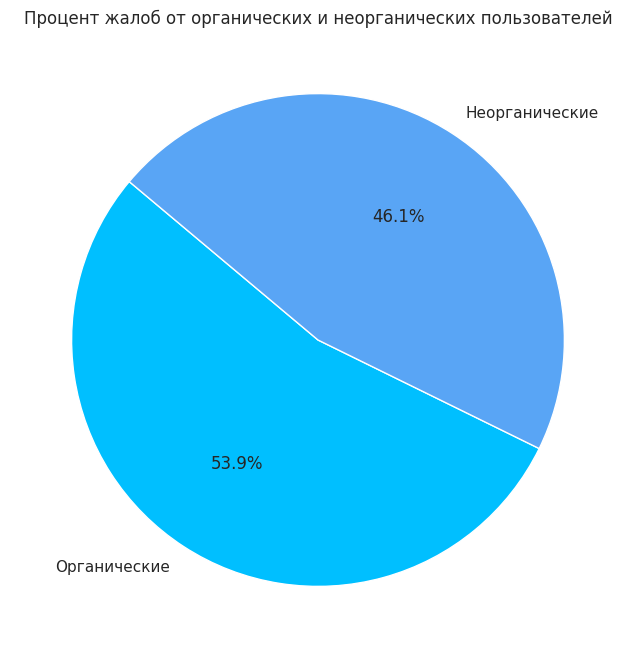

In [88]:
org_complaints = mdwr[mdwr['is_org']]['complain_count'].sum()
norg_complaints = mdwr[~mdwr['is_org']]['complain_count'].sum()

labels = ['Органические', 'Неорганические']
sizes = [org_complaints, norg_complaints]
colors = [accent_color, accent_color2]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=blue_pie_colors, autopct='%1.1f%%', startangle=140)
plt.title('Процент жалоб от органических и неорганических пользователей')
plt.show()

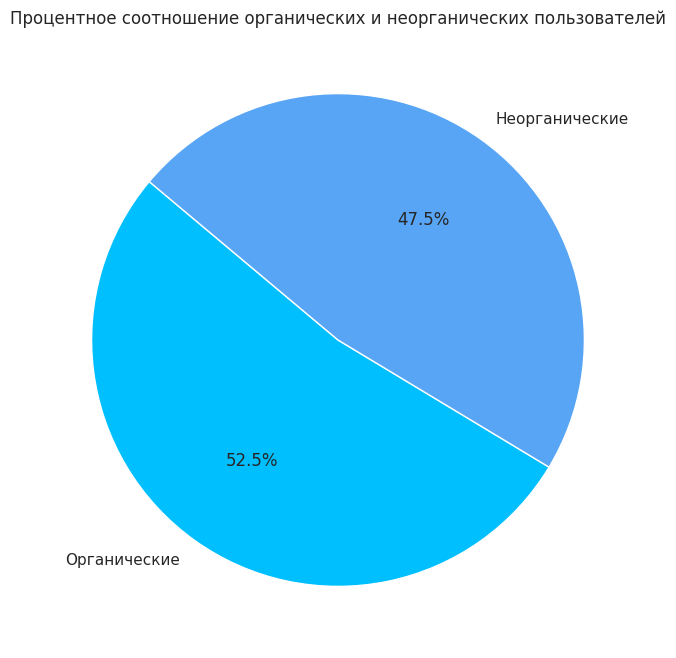

In [89]:
num_org_users = org_df['userid'].nunique()
num_norg_users = norg_df['userid'].nunique()

labels = ['Органические', 'Неорганические']
sizes = [num_org_users, num_norg_users]
colors = [accent_color, accent_color2]


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=blue_pie_colors, autopct='%1.1f%%', startangle=140)
plt.title('Процентное соотношение органических и неорганических пользователей')
plt.show()